In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# Conjunto de dados
data = pd.Series([128, 100, 180, 150, 200, 90, 340, 105, 85, 270,
                  200, 65, 230, 150, 150, 120, 130, 80, 230, 200,
                  110, 126, 170, 132, 140, 112, 90, 340, 170, 190])
notas = pd.DataFrame({'Notas':[86, 96, 82, 98, 100],
                      'Pesos':[0.5, 0.15, 0.2, 0.1, 0.05]})
notas.index = ['Média do teste', 'Prova bimestral', 'Prova final',
               'Informática', 'Dever de casa']

#Aula 2
* Classes
* Amplitude
* Ponto médio
* Frequência relativa

In [ ]:
# Valores máximo, mínimo e número de classes
v_max = data.max()
v_min = data.min()
n_classes = 7

# Distribuição de Frequências
dist_freq = data.value_counts(bins=n_classes).sort_index()

# Amplitude das classes e intervalos
amplitude_classe = round((v_max-v_min)/n_classes)
intervalos = pd.interval_range(start=v_min, end=v_max, freq=amplitude_classe)

# Pontos médios
pts_medios = [inter.mid for inter in intervalos]

# Construção do gráfico
nova_dist_freq = pd.DataFrame(dist_freq)
nova_dist_freq = nova_dist_freq.reset_index()
nova_dist_freq.columns = ['Classe', 'Frequência']
nova_dist_freq['Classe'] = intervalos
nova_dist_freq['Pontos médios'] = pts_medios
observacoes = len(data)
nova_dist_freq['Frequência relativa'] = nova_dist_freq['Frequência']/observacoes      # Frequência relativa = frequência da classe / numero total de elementos
nova_dist_freq['Frequência acumulada'] = nova_dist_freq['Frequência'].cumsum()

display(nova_dist_freq)

,Classe,Frequência,Pontos médios,Frequência relativa,Frequência acumulada
0,"(65, 104]",6,84.5,0.200000,6
1,"(104, 143]",9,123.5,0.300000,15
2,"(143, 182]",6,162.5,0.200000,21
3,"(182, 221]",4,201.5,0.133333,25
4,"(221, 260]",2,240.5,0.066667,27
5,"(260, 299]",1,279.5,0.033333,28
6,"(299, 338]",2,318.5,0.066667,30


#Aula 3
* Construção de gráficos

<ipython-input-23-822d56f41480>:1: MatplotlibDeprecationWarning: The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they should be passed as keyword, not positionally.
  plt.stem(nova_dist_freq['Pontos médios'], nova_dist_freq['Frequência relativa'], use_line_collection=True)


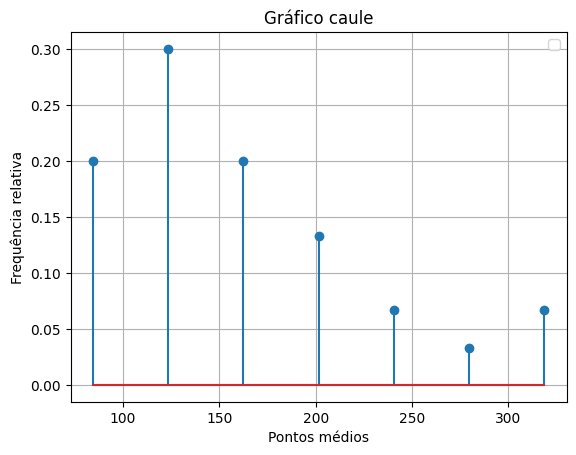

In [ ]:
plt.stem(nova_dist_freq['Pontos médios'], nova_dist_freq['Frequência relativa'], use_line_collection=True)
plt.xlabel('Pontos médios')
plt.ylabel('Frequência relativa')
plt.title('Gráfico caule')
plt.grid()
plt.legend()
plt.show()

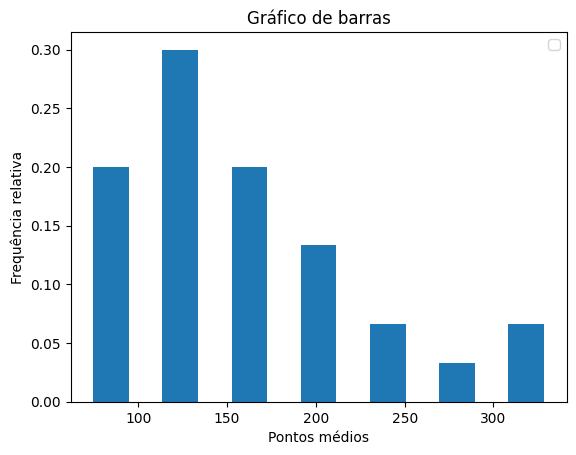

In [ ]:
plt.bar(nova_dist_freq['Pontos médios'], nova_dist_freq['Frequência relativa'], width=20, align='center')
plt.xlabel('Pontos médios')
plt.ylabel('Frequência relativa')
plt.title('Gráfico de barras')
plt.grid(False)
plt.legend()
plt.show()

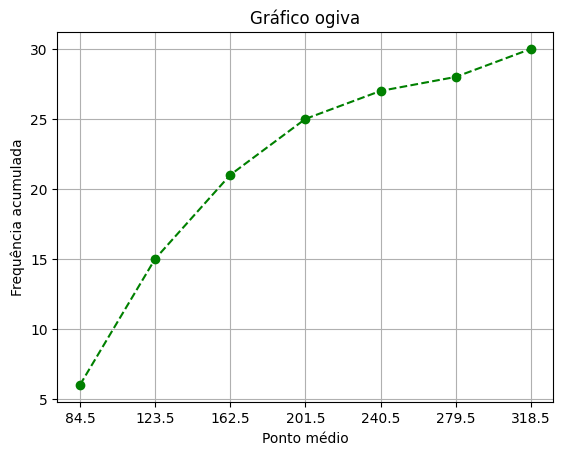

In [ ]:
plt.plot(nova_dist_freq['Pontos médios'], nova_dist_freq['Frequência acumulada'], 'go--')
plt.xlabel('Ponto médio')
plt.ylabel('Frequência acumulada')
plt.title('Gráfico ogiva')
plt.xticks(nova_dist_freq['Pontos médios'])
plt.grid()

#Aula 4
* Média, moda, mediana
* Média ponderada
* Média de frequências

In [ ]:
# Média, moda e mediana
media = data.mean()
mediana = data.median()
moda = list(data.mode())
print(f'Média: {media}')
print(f'Mediana: {mediana}')
print(f'Moda: {moda[0]}')  # [0] mostra o maior valor, [1] mostra o segundo maior valor, nao colocar nada mostra todos, etc...


# Média ponderada - definição
display(notas)  # DataFrame do primeiro código láaaa em cima
media_ponderada = sum(notas['Notas'] * notas['Pesos']) / notas['Pesos'].sum()
print(f'A média final é {media_ponderada}.')

# Média ponderada - biblioteca Numpy
media_ponderada = np.average(a=notas['Notas'], weights=notas['Pesos'])
print(f'A média final é {media_ponderada}.')


preco = (nova_dist_freq['Frequência']*nova_dist_freq['Pontos médios']).sum()/observacoes
print(f'O preço médio de um navegador GPS é de US${preco:.2f}.')

Média: 159.43333333333334
Mediana: 145.0
Moda: 150


,Notas,Pesos
Média do teste,86,0.50
Prova bimestral,96,0.15
Prova final,82,0.20
Informática,98,0.10
Dever de casa,100,0.05


A média final é 88.6.
A média final é 88.6.
O preço médio de um navegador GPS é de US$159.90.


#Aula 5
* Desvio padrão
* Método agg
* CV

In [ ]:
# Desvio padrão
desvio_padrao = data.std(numeric_only=True)
print(f'Desvio padrão: {desvio_padrao}')

# Coeficiente de variação
CV = data.std()/data.mean() * 100   # Ponto médio / média
print(f'Coeficiente de variação: {CV}')

# Método agg
data.agg(['mean', 'median', 'std'])



# Comparação entre dados
salarios = pd.DataFrame({'Dallas': [41.6, 50.0, 49.5, 38.7, 39.9,
                                    45.8, 44.7, 47.8, 40.5, 44.3],
                         'New York': [45.6, 41.5, 57.6, 55.1, 59.3,
                                      59.0, 50.6, 47.2, 42.3, 51.0]})
display(salarios)

# Cálculo das médias, desvios padrão e coeficiente de variação
est_sal =pd.DataFrame(salarios.mean(axis=0, numeric_only=True), columns=['Média'])
est_sal['DesvPad'] = salarios.std(axis=0, ddof=0, numeric_only=True)
est_sal['CV'] = est_sal['DesvPad']/est_sal['Média']*100
display(est_sal)

Desvio padrão: 69.83561157230714
Coeficiente de variação: 43.80239069975359


mean      159.433333
median    145.000000
std        69.835612
dtype: float64

#Aula 6
* Quartis
* Amplitude interquartis
* Outliers (z-escore)
* Boxplot

Quartis em um Panda Series:


0.25    110.5
0.50    145.0
0.75    197.5
dtype: float64

Amplitude interquartil: 87.0
Inferior = -20.0
Superior = 328.0
Outlier inferior:


Series([], dtype: int64)

Outlier superior:


6     340
27    340
dtype: int64

---------Método describe---------


Text(0.5, 1.0, 'Distribuição dos dados')

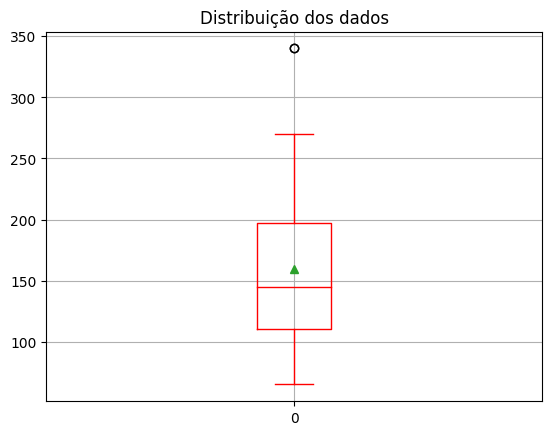

In [2]:
quartis = data.quantile([0.25, 0.5, 0.75], interpolation='linear')    # Pode ser mudada os valores interiores para outras separatrizes
print('Quartis em um Panda Series:')
display(quartis) # É um objeto panda Series

# Calculando a amplitude interquartil
interquartil = quartis[0.75] - quartis[0.25]
print(f'Amplitude interquartil: {interquartil}')

# Limites para detecção de outliers
lim_min = quartis[0.25] - 1.5*interquartil
lim_max = quartis[0.75] + 1.5*interquartil
print(f'Inferior = {lim_min}')
print(f'Superior = {lim_max}')

# Procurando por outliers
out_inf = data.loc[data <= lim_min]
print('Outlier inferior:')
display(out_inf)

out_sup = data.loc[data >= lim_max]
print('Outlier superior:')
display(out_sup)


# Método describe
print('---------Método describe---------')
data.describe()


# Boxplot
df = pd.DataFrame(data)
df.boxplot(color = 'red', vert=True, whis=1.5, showmeans=True)
plt.title('Distribuição dos dados')

In [ ]:
import scipy.stats as stats
# Criando o conjunto de dados
dados = pd.DataFrame({'Nome': ['Nik', 'Kate', 'Joe', 'Mitch', 'Alana'],
                      'Idade': [32, 30, 67, 34, 20],
                      'Renda': [80000, 90000, 45000, 23000, 12000]})
print('Tabela original:')
display(dados)

# Calculando os escores-z das colunas numéricas
tabela_z = dados.select_dtypes(include='number').apply(stats.zscore)
print('Tabela com colunas substituídas pelos escores-z:')
display(tabela_z)

# Agregando novas colunas com os escores-z
dados['Escore-z Idade'] = stats.zscore(dados['Idade'])
dados['Escore-z Renda'] = stats.zscore(dados['Renda'])
print('Tabela orignal + escores-z:')
display(dados)

Tabela original:


,Nome,Idade,Renda
0,Nik,32,80000
1,Kate,30,90000
2,Joe,67,45000
3,Mitch,34,23000
4,Alana,20,12000


Tabela com colunas substituídas pelos escores-z:


,Idade,Renda
0,-0.288493,0.978700
1,-0.413925,1.304934
2,1.906565,-0.163117
3,-0.163061,-0.880830
4,-1.041085,-1.239687


Tabela orignal + escores-z:


,Nome,Idade,Renda,Escore-z Idade,Escore-z Renda
0,Nik,32,80000,-0.288493,0.978700
1,Kate,30,90000,-0.413925,1.304934
2,Joe,67,45000,1.906565,-0.163117
3,Mitch,34,23000,-0.163061,-0.880830
4,Alana,20,12000,-1.041085,-1.239687


#Aula 7
* Espaços amostrais

In [ ]:
import itertools

# Resultados para o lançamento da moeda e do dado
moeda = ['Cara', 'Coroa']
dado = ['1', '2', '3', '4', '5', '6']


# Criação do espaço amostral
omega = [resultado for resultado in itertools.product(moeda, dado)]


# Visualização dos elementos do espaço amostral
print('** Espaço amostral **')
for resultado in omega:
  print(resultado)

# Número de elementos no espaço amostral
n_omega = len(omega)
print(f'\nExistem {n_omega} elementos no espaço amostral.')

# Probabilidade de que Cara seja escolhido
evento_1 = [escolha for escolha in omega if 'Cara' in escolha]
print(evento_1)
prob_1 = len(evento_1)/len(omega)
print(f'Probabilidade de Cara ser escolhido é {prob_1*100}%')

** Espaço amostral **
('Cara', '1')
('Cara', '2')
('Cara', '3')
('Cara', '4')
('Cara', '5')
('Cara', '6')
('Coroa', '1')
('Coroa', '2')
('Coroa', '3')
('Coroa', '4')
('Coroa', '5')
('Coroa', '6')

Existem 12 elementos no espaço amostral.
[('Cara', '1'), ('Cara', '2'), ('Cara', '3'), ('Cara', '4'), ('Cara', '5'), ('Cara', '6')]
Probabilidade de Cara ser escolhido é 50.0%


#Aula 8
* Probabilidades condicionais

In [7]:
# Criação do pandas DataFrame
esportes = pd.DataFrame({'gênero': np.repeat(np.array(['Masculino', 'Feminino']), 150),
                         'esporte': np.repeat(np.array(['Beisebol', 'Basquete',
                                                        'Futebol', 'Vôlei',
                                                        'Beisebol', 'Basquete',
                                                        'Futebol', 'Vôlei']),
                                              (34, 40, 58, 18, 34, 52, 20, 44))})
# Inspeção de algumas linhas do painel de dados
display(esportes.head())
display(esportes.tail())

# Construção da tabela de distrbuição conjunta
dist_conj = pd.crosstab(index=esportes['gênero'],
                        columns=esportes['esporte'], margins=True)
display(dist_conj)

# Probabilidade de ser do gênero masculino, dado que é fã de beisebol
prob = dist_conj.iloc[1, 1] / dist_conj.iloc[2, 1]  # Posição dentro da tabela (y,x)
print(f'P(Masculino|Beisebol) = {prob*100:.2f}%')

# Probabilidade de ser fã de basquete, dado que é do gênero feminino
prob = dist_conj.iloc[0, 0] / dist_conj.iloc[0, 4]  # Posição dentro da tabela (y,x)
print(f'P(Basquete|Feminino) = {prob*100:.2f}%')

# Probabilidades condicionais do tipo P(Esporte|Gênero)
dist_conj_colunas = pd.crosstab(index=esportes['gênero'],
                                columns=esportes['esporte'],
                                margins=True, normalize='columns')
display(dist_conj_colunas)

# Probabilidades condicionais do tipo P(Gênero|Esporte)
dist_conj_linhas = pd.crosstab(index=esportes['gênero'],
                               columns=esportes['esporte'],
                               margins=True, normalize='index')
display(dist_conj_linhas)

,gênero,esporte
0,Masculino,Beisebol
1,Masculino,Beisebol
2,Masculino,Beisebol
3,Masculino,Beisebol
4,Masculino,Beisebol


,gênero,esporte
295,Feminino,Vôlei
296,Feminino,Vôlei
297,Feminino,Vôlei
298,Feminino,Vôlei
299,Feminino,Vôlei


esporte,Basquete,Beisebol,Futebol,Vôlei,All
gênero,,,,,
Feminino,52,34,20,44,150
Masculino,40,34,58,18,150
All,92,68,78,62,300


esporte,Basquete,Beisebol,Futebol,Vôlei,All
gênero,,,,,
Feminino,0.565217,0.5,0.25641,0.709677,0.5
Masculino,0.434783,0.5,0.74359,0.290323,0.5


esporte,Basquete,Beisebol,Futebol,Vôlei
gênero,,,,
Feminino,0.346667,0.226667,0.133333,0.293333
Masculino,0.266667,0.226667,0.386667,0.120000
All,0.306667,0.226667,0.260000,0.206667


# Aula 9
* Análises discretas
* Variáveis aleatórias discretas
* Construir uma distribuição discreta de probabilidades para uma variável aleatória (discreta);
* Calcular a média, a variância e o desvio padrão de uma distribuição discreta de probabilidades

In [ ]:
tabela = pd.DataFrame({'Vendas/dia': list(range(8)),
                       'Num_dias': [16, 19, 15, 21, 9, 10, 8, 2]})

# Cálculo das probabilidades
total_vendas = tabela['Num_dias'].sum()
tabela['P(x)'] = tabela['Num_dias']/total_vendas

# Cálculo da probabilidade acumulada
tabela['P_ac(x)'] = tabela['P(x)'].cumsum()
display(tabela)

In [ ]:
# Gráfico de segmentos verticais (caules)
plt.stem(tabela['Vendas/dia'], tabela['P(x)'], linefmt='b-',
         label='P(efetuar x vendas ao dia)')
plt.xlabel('Vendas por dia')
plt.ylabel('Probabilidades')
plt.title('Distribuição discreta de probabilidades')
plt.grid()
plt.legend()
plt.show()

In [ ]:
# Gráfico de barras verticais
plt.bar(tabela['Vendas/dia'], tabela['P(x)'],
        label='P(efetuar x vendas ao dia)')
plt.xlabel('Vendas por dia')
plt.ylabel('Probabilidades')
plt.title('Distribuição discreta de probabilidades')
plt.grid(False)
plt.legend()
plt.show()

In [ ]:
# Representação gráfica da probabilidade discreta acumulada
plt.plot(tabela['Vendas/dia'], tabela['P_ac(x)'], 'g-o',
         label='P(efetuar x vendas ao dia) [acumulada)]')
plt.xlabel('Vendas por dia')
plt.ylabel('Probabilidades')
plt.title('Probabilidade discreta acumulada')
plt.grid()
plt.legend()
plt.show()

In [ ]:
# Inserção da coluna Vendas*Probabilidades (xP(x))
tabela['xP(x)'] = tabela['Vendas/dia']*tabela['P(x)']

# Cálculo da média da distribuição (soma de todos xP(x))
media = tabela['xP(x)'].sum()
print(f'A média da distribuição é de {media:.1f} vendas/dia.')

# Inserção da coluna Vendas^2*Probabilidades (x²P(x))
tabela['x^2P(x)'] = tabela['Vendas/dia']**2 * tabela['P(x)']
display(tabela)

# Cálculo da variância da distribuição (soma de x²P(x) menos média²)
variancia = tabela['x^2P(x)'].sum() - media**2
print(f'A variância da distribuição é de {variancia:.1f} (vendas/dia)^2.')

# Cálculo do desvio padrão da distribuição (raíz quadrada da variância)
desvio = variancia**(1/2)
print(f'O desvio padrão da distribuição é de {desvio:.1f} vendas/dia.')

# Aula 10
* Distribuição de propriedade binomial
* ( quando há apenas dois resultados (V e F) e a probabilidade não muda em tentativas)

Sete adultos que participaram da pesquisa são selecionados aleatoriamente e indagados se utilizam um
telefone celular(46%) para acessar mídia social. Construa uma distribuição de probabilidade binomial para o número de adultos que respondeu sim.

In [24]:
from scipy.stats import binom

# Condições do experimento probabilístico binomial
exp = 7 # (sete adultos)
sucesso = 0.46
val_x = list(range(exp + 1)) # (possíveis sucessos)

# Geração da tabela de distribuição de probabilidade binomial
dist_binomial = pd.DataFrame({'Sucesso': val_x})
dist_binomial['Probabilidades'] = binom.pmf(val_x, exp, sucesso) # pmf é uma função que faz a probabilidade em experimentos binomiais
display(dist_binomial)

# Média (exp * sucesso)
media = exp * sucesso
# Variância (exp * sucesso * fracasso (1 - sucesso))
variancia = exp * sucesso * (1 - sucesso)
# Desvio padrão (raíz quadrada da variância)
desvio = variancia ** (1/2)

print(f'Média = {media:.2f} indivíduos')
print(f'Variância = {variancia:.2f} indivíduos^2')
print(f'Desvio padrão = {desvio:.2f} indivíduos')

# Cálculo dos parâmetros usando o método stats de binom
med, var = binom.stats(exp, sucesso)
print('** Parâmetros populacionais - stats **')
print(f'Média = {med:.2f} ; Variância = {var:.2f}')

,Sucesso,Probabilidades
0,0,0.013389
1,1,0.079840
2,2,0.204035
3,3,0.289679
4,4,0.246763
5,5,0.126123
6,6,0.035813
7,7,0.004358


Média = 3.22 indivíduos
Variância = 1.74 indivíduos^2
Desvio padrão = 1.32 indivíduos
** Parâmetros populacionais - stats **
Média = 3.22 ; Variância = 1.74


Uma pesquisa com adultos americanos descobriu que 62% das mulheres acreditam que há uma ligação entre jogos violentos e adolescentes que apresentam comportamento violento. Você seleciona aleatoriamente
quatro mulheres americanas e pergunta se elas acreditam nessa ligação entre jogos e comportamento violentos. Encontre a probabilidade de que:


*   exatamente duas mulheres respondam sim
*   ao menos duas mulheres respondam sim
*   menos de duas mulheres responderam sim

In [30]:
exp = 4
sucesso = 0.62
val_x = list(range(exp + 1))

dist_binomial = pd.DataFrame({'Sucesso': val_x})
dist_binomial['Probabilidades'] = binom.pmf(val_x, exp, sucesso)
display(dist_binomial)

tab_filtrada = dist_binomial['Probabilidades'].loc[dist_binomial['Sucesso'] == 2]
print(tab_filtrada)
prob1 = tab_filtrada.values[0]  # apenas um valor
print(f'P(2 mulheres respondam sim) = {prob1*100:.1f}%')

tab_filtrada = dist_binomial['Probabilidades'].loc[dist_binomial['Sucesso'] >= 2]
print(tab_filtrada)
prob2 = tab_filtrada.sum()      # mais de um valor resultado (sum())
print(f'P(2 ou mais mulheres respondam sim) = {prob2*100:.1f}%')

tab_filtrada = dist_binomial['Probabilidades'].loc[dist_binomial['Sucesso'] < 2]
print(tab_filtrada)
prob3 = tab_filtrada.sum()      # mais de um valor resultado (sum())
print(f'P(menos de 2 mulheres respondam sim) = {prob3*100:.1f}%')

,Sucesso,Probabilidades
0,0,0.020851
1,1,0.136083
2,2,0.333044
3,3,0.362259
4,4,0.147763


2    0.333044
Name: Probabilidades, dtype: float64
P(2 mulheres respondam sim) = 33.3%
2    0.333044
3    0.362259
4    0.147763
Name: Probabilidades, dtype: float64
P(2 ou mais mulheres respondam sim) = 84.3%
0    0.020851
1    0.136083
Name: Probabilidades, dtype: float64
P(menos de 2 mulheres respondam sim) = 15.7%
